In [1]:
from google.colab import drive
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/fastfood_calories.csv'


Mounted at /content/drive


In [3]:
fastfood_data = pd.read_csv(file_path)
def protein_similarity(item1, item2):
    return 1 / (1 + abs(item1 - item2))

# Normalize protein content
scaler = MinMaxScaler()
fastfood_data['normalized_protein'] = scaler.fit_transform(fastfood_data[['protein']])
G_protein = nx.Graph()


In [16]:
for index, row in fastfood_data.iterrows():
    G_protein.add_node(row['item'], restaurant=row['restaurant'], protein=row['normalized_protein'])

# Add edges based on protein content similarity (within each restaurant)
threshold = 0.2

for restaurant in fastfood_data['restaurant'].unique():
    restaurant_items = fastfood_data[fastfood_data['restaurant'] == restaurant]
    for i in range(len(restaurant_items)):
        for j in range(i + 1, len(restaurant_items)):
            item1 = restaurant_items.iloc[i]['item']
            item2 = restaurant_items.iloc[j]['item']
            protein1 = restaurant_items.iloc[i]['normalized_protein']
            protein2 = restaurant_items.iloc[j]['normalized_protein']
            similarity = protein_similarity(protein1, protein2)
            if similarity >= threshold:
                G_protein.add_edge(item1, item2, weight=similarity)


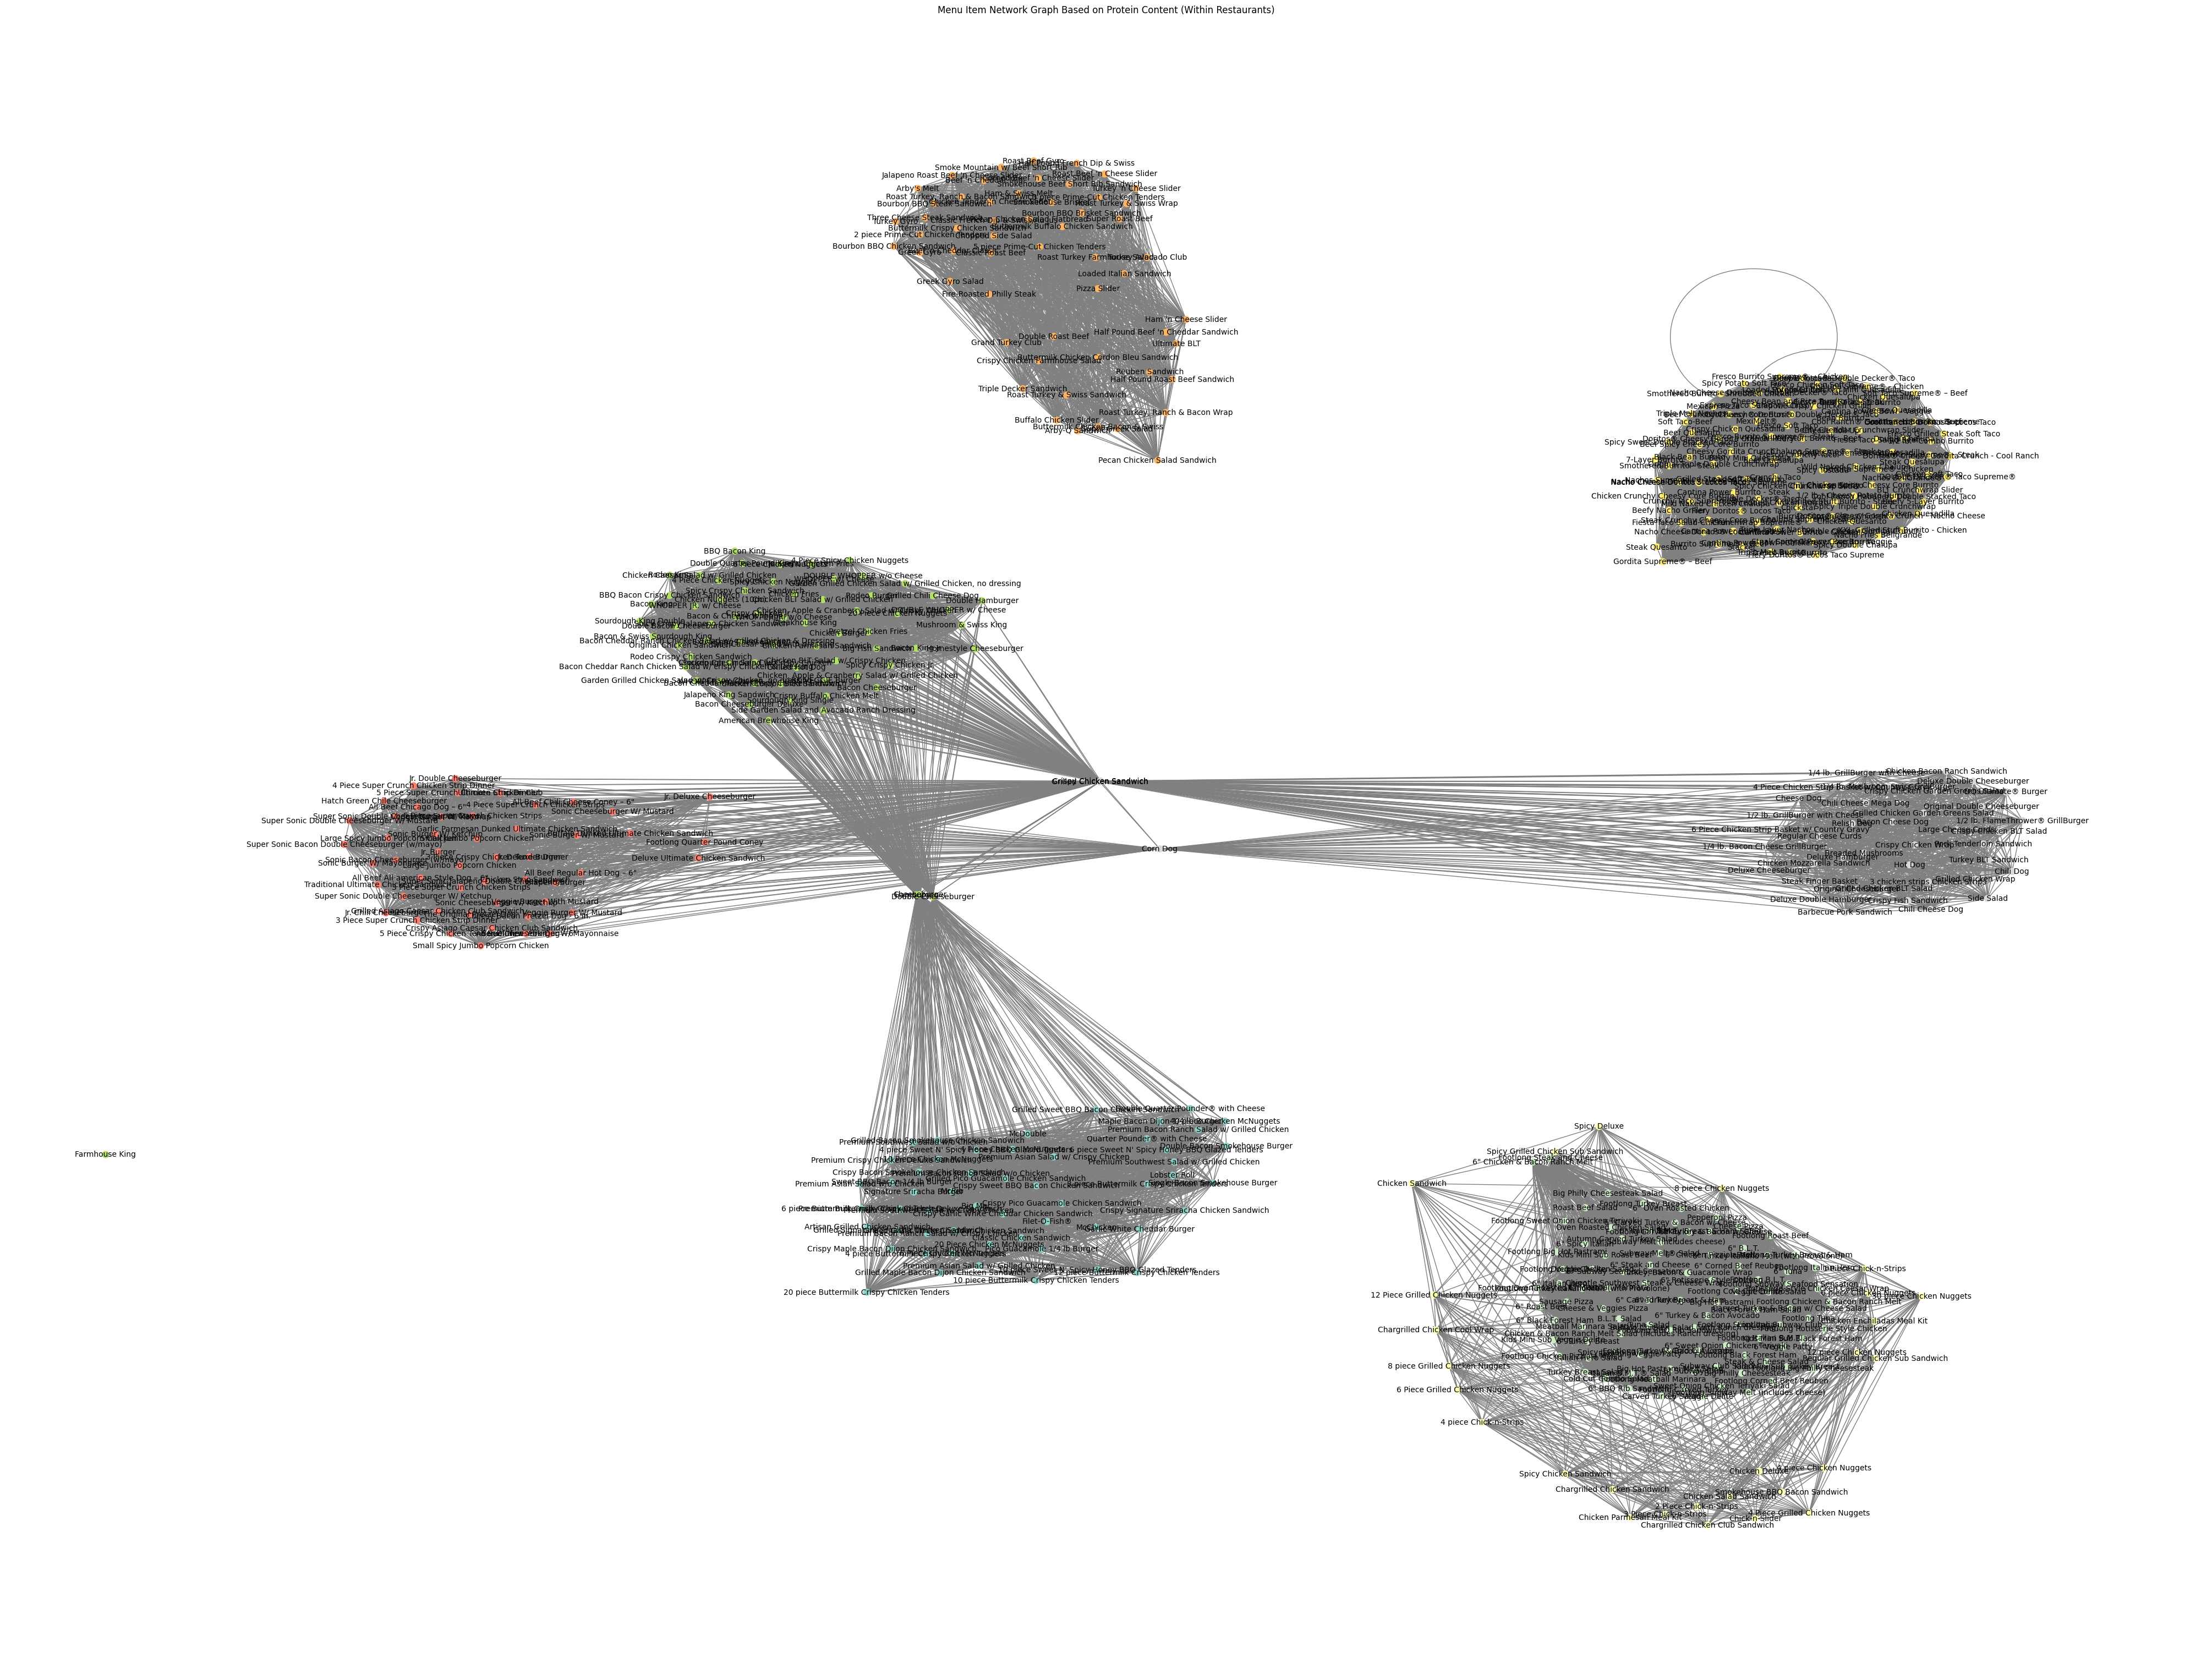

In [15]:
# Visualization with adjusted layout and figure size
plt.figure(figsize=(40, 30))  # Increased figure size

# Generate positions for each node using spring layout with some adjustments
pos = nx.spring_layout(G_protein, k=0.15, iterations=20)  # Adjust 'k' for node spacing, 'iterations' for layout precision

# Map each restaurant to a unique color
unique_restaurants = list(fastfood_data['restaurant'].unique())
restaurant_color_map = {restaurant: i for i, restaurant in enumerate(unique_restaurants)}

# Assign colors to nodes based on their restaurant
node_colors = [restaurant_color_map[G_protein.nodes[node]['restaurant']] for node in G_protein.nodes]

# Draw the graph
nx.draw(G_protein, pos, node_color=node_colors, with_labels=True, node_size=70, font_size=10, edge_color='gray', cmap=plt.cm.Set3)
plt.title("Menu Item Network Graph Based on Protein Content (Within Restaurants)")
plt.show()
